<a href="https://colab.research.google.com/github/vihan-lakshman/mutagenic/blob/main/ESMFunctionalEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install esm

In [2]:
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig

# Will instruct you how to get an API key from huggingface hub, make one with "Read" permission.
login()

/usr/local/lib/python3.10/dist-packages/google/cloud/storage/transfer_manager.py:30: UserWarning: The module `transfer_manager` is a preview feature. Functionality and API may change. This warning will be removed in a future release.
  warnings.warn(


In [3]:
model: ESM3InferenceClient = ESM3.from_pretrained("esm3_sm_open_v1").to("cuda") # or "cpu"
prompt = "MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKΩESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGV"
protein = ESMProtein(sequence=prompt)
print(protein.sequence)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/esm/pretrained.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(


MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKΩESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGV


Function Analysis

In [4]:
from esm.utils.types import FunctionAnnotation

# interpro_function_annotations = [
#     FunctionAnnotation(label="IPR050145", start=1, end=142), # 1 indexed, inclusive;
#     FunctionAnnotation(label="IPR002048", start=4, end=75),
#     FunctionAnnotation(label="IPR002048", start=77, end=144),
#     FunctionAnnotation(label="IPR011992", start=1, end=143),
#     FunctionAnnotation(label="IPR018247", start=17, end=29),
#     FunctionAnnotation(label="IPR018247", start=53, end=65),
#     FunctionAnnotation(label="IPR018247", start=90, end=102),
#     FunctionAnnotation(label="IPR018247", start=126, end=138),
# ]
interpro_function_annotations = [
     FunctionAnnotation(label="IPR011992", start=1, end=1),
]

In [5]:
from esm.tokenization import InterProQuantizedTokenizer

def get_keywords_from_interpro(
    interpro_annotations,
    interpro2keywords=InterProQuantizedTokenizer().interpro2keywords,
):
    keyword_annotations_list = []
    for interpro_annotation in interpro_annotations:
        keywords = interpro2keywords.get(interpro_annotation.label, [])
        keyword_annotations_list.extend([
            FunctionAnnotation(
                label=keyword,
                start=interpro_annotation.start,
                end=interpro_annotation.end,
            )
            for keyword in keywords
        ])
    return keyword_annotations_list

protein2 = ESMProtein(function_annotations=get_keywords_from_interpro(interpro_function_annotations))
print(protein2.function_annotations)
print(len(protein2.function_annotations))


[FunctionAnnotation(label='ef', start=1, end=1), FunctionAnnotation(label='hand', start=1, end=1), FunctionAnnotation(label='pair', start=1, end=1), FunctionAnnotation(label='ef hand', start=1, end=1), FunctionAnnotation(label='hand domain', start=1, end=1), FunctionAnnotation(label='domain pair', start=1, end=1)]
6


In [6]:
protein2.sequence = "A"

In [7]:
import torch
import torch.nn as nn
protein2_tensor = model.encode(protein2)
# protein2_tensor.function = protein2_tensor.function.type(torch.long)
print(protein2_tensor.function)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0],
        [114,  42, 121, 229, 239, 203,  49, 115],
        [  0,   0,   0,   0,   0,   0,   0,   0]], device='cuda:0')


In [8]:
d_model = 1536
embedding_function = model.encoder.function_embed

In [9]:
# Move embedding_function to the same device as protein2_tensor.function
device = protein2_tensor.function.device  # Get the device of protein2_tensor.function
embedding_function = embedding_function.to(device)  # Move embedding_function to the device

function_embed = torch.cat(
    [
        embed_fn(funcs.to(device)) # Ensure funcs is on the same device
        for embed_fn, funcs in zip(
            embedding_function, protein2_tensor.function.unbind(-1)
        )
    ],
    -1,
)

print(function_embed)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2188,  0.5234,  0.0160,  ..., -0.1387, -0.6992, -0.0571],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<CatBackward0>)


Function Analysis At Scale!

In [10]:
# prompt: read in .tsv file named 'InterPRoDescriptions.tsv' as dataframe and find all InterPro IDs in Accession column whose GO Terms column contains one of the following GO term IDs: [GO:0009055, GO:0008270, GO:0019888, GO:0003677] and save these into four separate lists of InterPro IDs (there may be overlap in the lists, that is okay!]. store the lists in a dictionary with the GO term ID as the key.

import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv('InterProDescriptions.tsv', sep='\t')

# Create an empty dictionary to store the InterPro IDs for each GO term
go_term_to_interpro_ids = {
    'GO:0009055': [],
    'GO:0008270': [],
    'GO:0005179': [],
    'GO:0003677': []
}

# Iterate through the DataFrame rows
for index, row in df.iterrows():
  go_terms = str(row['GO Terms']).split(',')
  for go_term in go_terms:
    if go_term in go_term_to_interpro_ids:
      go_term_to_interpro_ids[go_term].append(row['Accession'])

# Print the lists of InterPro IDs for each GO term
for go_term, interpro_ids in go_term_to_interpro_ids.items():
  print(f"Number of InterPro IDs for {go_term}: {len(interpro_ids)}")

GO_term_name_dict = {
    'GO:0009055': 'electron transfer activity',
    'GO:0008270': 'zinc ion binding',
    'GO:0005179': 'hormone activity',
    'GO:0003677': 'DNA binding'
}

Number of InterPro IDs for GO:0009055: 74
Number of InterPro IDs for GO:0008270: 230
Number of InterPro IDs for GO:0005179: 61
Number of InterPro IDs for GO:0003677: 664


In [11]:
#protein that only has one function?
#longer sequences of all As, all Gs, or completely random
def get_label_embedding(interpro_label,sequence):
  hostProtein = ESMProtein(sequence=sequence)
  embedding_function = model.encoder.function_embed
  hostProtein.function_annotations = get_keywords_from_interpro([FunctionAnnotation(label=interpro_label, start=1, end=len(sequence))])
  hostProtein_tensor = model.encode(hostProtein)
  device = hostProtein_tensor.function.device  # Get the device of protein2_tensor.function
  embedding_function = embedding_function.to(device)  # Move embedding_function to the device

  function_embed = torch.cat(
      [
          embed_fn(funcs.to(device)) # Ensure funcs is on the same device
          for embed_fn, funcs in zip(
              embedding_function, hostProtein_tensor.function.unbind(-1)
          )
      ],
      -1,
  )

  if function_embed.shape[0] >= 3:
      row_sum = function_embed.sum(dim=0)  # Sum all rows
      row_avg = row_sum / (function_embed.shape[0] - 2)  # Divide by (number of rows - 2)
      row_avg_np = row_avg.cpu().detach().type(torch.float32).numpy()
      return row_avg_np
  else:
      return None



In [12]:
!pip install umap-learn

In [13]:
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import random

# List of standard amino acid single-letter codes
amino_acids = "ACDEFGHIKLMNPQRSTVWY"

# Function to generate a random amino acid sequence of a given length
def generate_random_sequence(length=10):
    return ''.join(random.choices(amino_acids, k=length))

# List of sequences to generate embeddings for
sequences = ["A", "AAAAAAAAAA", "G", "GGGGGGGGGG","random"]

# Dictionary to store embeddings for all sequences by GO term
go_term_to_embeddings = {}
i = 0

# Process GO terms for each sequence
for go_term, interpro_ids in go_term_to_interpro_ids.items():
    embeddings_by_sequence = {seq: [] for seq in sequences}

    for interpro_id in interpro_ids:
        for seq in sequences:
            if seq=="random":
              actual_seq = generate_random_sequence()
            else:
              actual_seq = seq
            embedding = get_label_embedding(interpro_id, sequence=actual_seq)
            if embedding is not None:
                embeddings_by_sequence[seq].append(embedding)

        if i % 100 == 0:
            print(f"Processed {i} GO terms")
        i += 1

    go_term_to_embeddings[go_term] = embeddings_by_sequence


Processed 0 GO terms
Processed 100 GO terms
Processed 200 GO terms
Processed 300 GO terms
Processed 400 GO terms
Processed 500 GO terms
Processed 600 GO terms
Processed 700 GO terms
Processed 800 GO terms
Processed 900 GO terms
Processed 1000 GO terms


In [14]:
print(go_term_to_embeddings)

{'GO:0009055': {'A': [array([ 0.29296875,  0.62109375, -0.08691406, ...,  0.4921875 ,
       -0.46289062, -0.33984375], dtype=float32), array([ 0.5234375 , -0.6328125 ,  0.234375  , ...,  0.54296875,
        0.09326172,  0.63671875], dtype=float32), array([ 0.06152344, -0.5390625 ,  1.15625   , ...,  0.72265625,
       -0.02929688,  0.65625   ], dtype=float32), array([-0.77734375,  0.34179688,  0.078125  , ...,  0.34179688,
        0.36328125, -0.07128906], dtype=float32), array([-0.9921875 , -0.3828125 ,  0.40820312, ...,  1.265625  ,
        0.5625    ,  0.33398438], dtype=float32), array([ 0.38671875,  0.80078125,  0.05322266, ...,  0.10498047,
       -0.4921875 ,  0.25585938], dtype=float32), array([-0.19140625,  0.31835938, -0.47265625, ...,  1.171875  ,
        0.9765625 , -0.7578125 ], dtype=float32), array([-0.48828125,  0.5859375 , -0.5078125 , ..., -0.02160645,
        0.11083984,  0.52734375], dtype=float32), array([ 0.01025391,  0.19433594,  0.13867188, ..., -0.03735352,
  

In [16]:
# prompt: go_term_to_embeddings is a dict of dict of lists. go through all the lists and remove any numpy arrays that are all zeros and save this as a new go_term_to_embeddings (save the old one as a copy under a different name)

# Create a copy of the original dictionary
original_go_term_to_embeddings = go_term_to_embeddings.copy()

# Iterate through the dictionary and remove all-zero arrays
new_go_term_to_embeddings = {}
for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
    new_embeddings_by_sequence = {}
    for sequence, embeddings in embeddings_by_sequence.items():
        new_embeddings = []
        for embedding in embeddings:
            if embedding is not None and not np.allclose(embedding, 0):
                new_embeddings.append(embedding)
        new_embeddings_by_sequence[sequence] = new_embeddings
    new_go_term_to_embeddings[go_term] = new_embeddings_by_sequence

go_term_to_embeddings = new_go_term_to_embeddings
go_term_to_embeddings

{'GO:0009055': {'A': [array([ 0.29296875,  0.62109375, -0.08691406, ...,  0.4921875 ,
          -0.46289062, -0.33984375], dtype=float32),
   array([ 0.5234375 , -0.6328125 ,  0.234375  , ...,  0.54296875,
           0.09326172,  0.63671875], dtype=float32),
   array([ 0.06152344, -0.5390625 ,  1.15625   , ...,  0.72265625,
          -0.02929688,  0.65625   ], dtype=float32),
   array([-0.77734375,  0.34179688,  0.078125  , ...,  0.34179688,
           0.36328125, -0.07128906], dtype=float32),
   array([-0.9921875 , -0.3828125 ,  0.40820312, ...,  1.265625  ,
           0.5625    ,  0.33398438], dtype=float32),
   array([ 0.38671875,  0.80078125,  0.05322266, ...,  0.10498047,
          -0.4921875 ,  0.25585938], dtype=float32),
   array([-0.19140625,  0.31835938, -0.47265625, ...,  1.171875  ,
           0.9765625 , -0.7578125 ], dtype=float32),
   array([-0.48828125,  0.5859375 , -0.5078125 , ..., -0.02160645,
           0.11083984,  0.52734375], dtype=float32),
   array([ 0.01025391

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


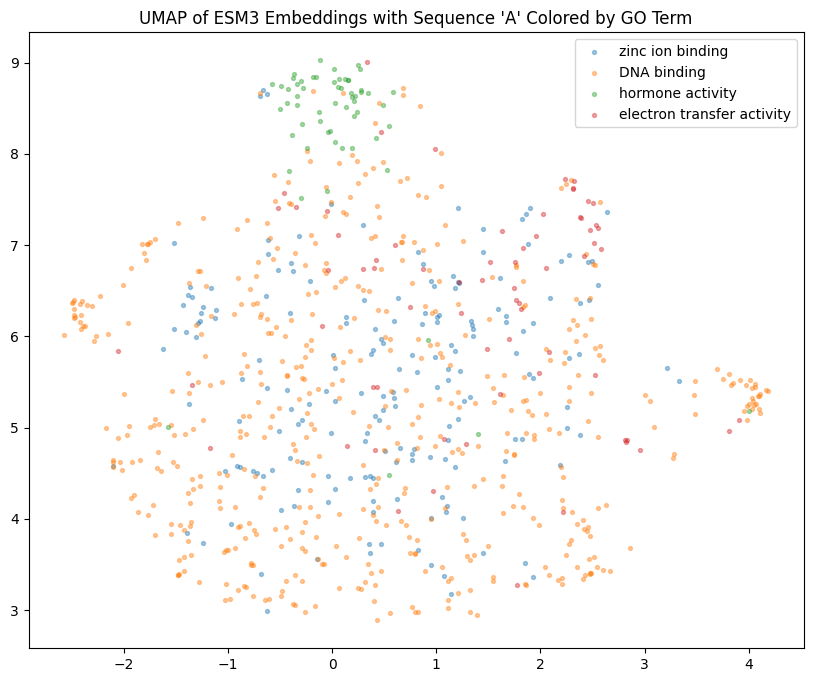

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


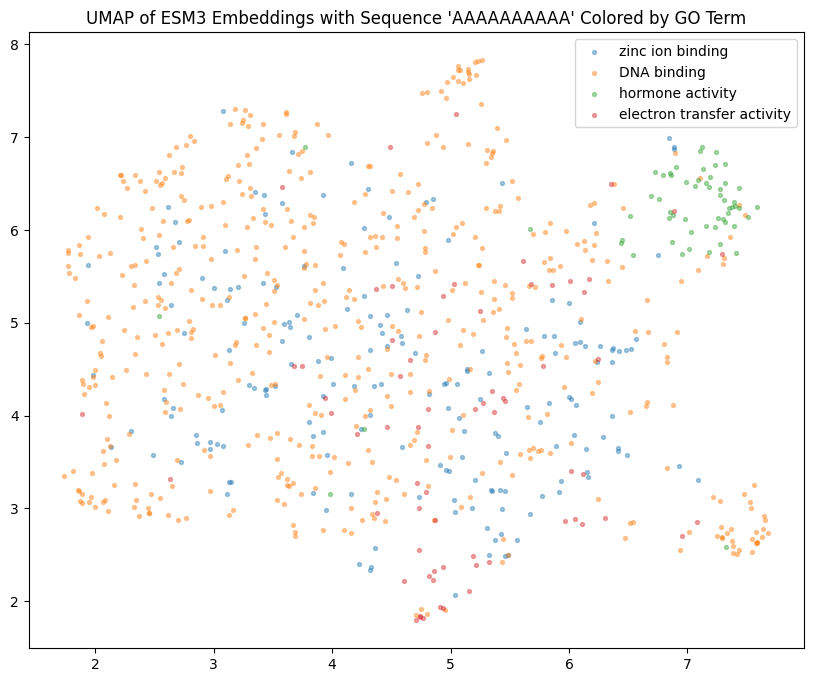

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


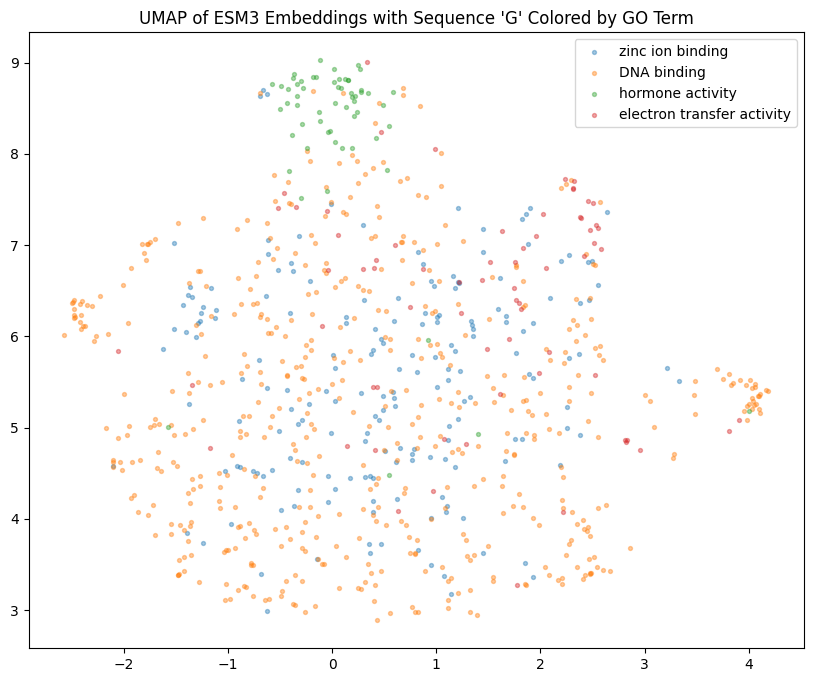

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


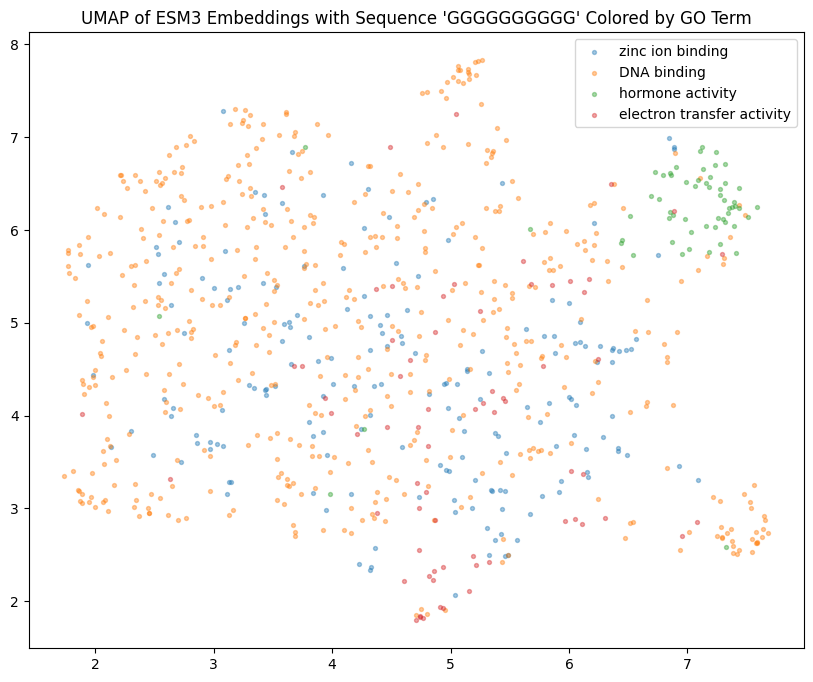

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


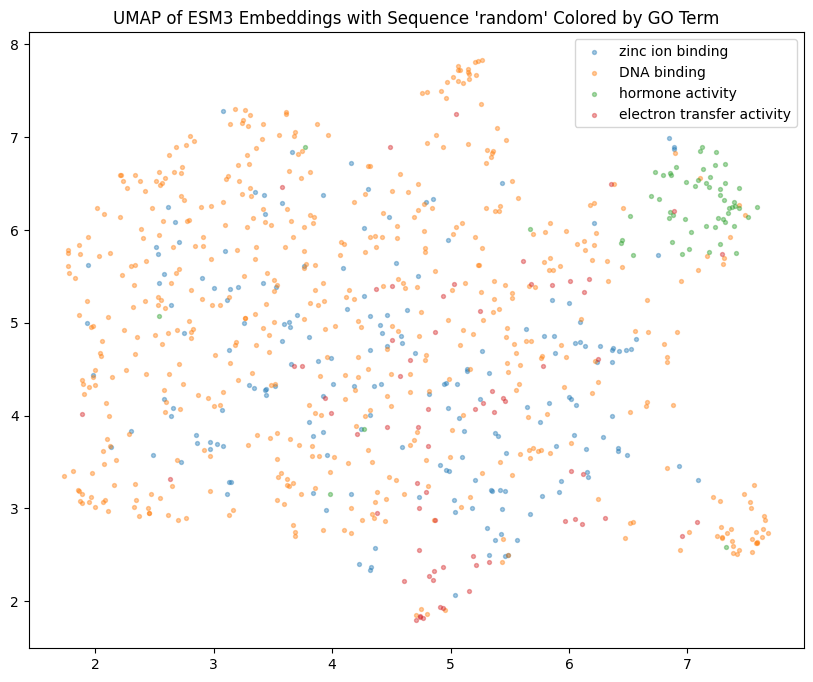

In [17]:
# Perform dimensionality reduction and plotting for each sequence
for seq in sequences:
    all_embeddings = []
    go_terms_for_embeddings = []

    # Collect embeddings for the current sequence
    for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
        for embedding in embeddings_by_sequence[seq]:
            all_embeddings.append(embedding)
            go_terms_for_embeddings.append(go_term)

    # Perform UMAP and plot if there are embeddings
    if all_embeddings:
        reducer = UMAP(n_components=2, random_state=42)
        reduced_embeddings = reducer.fit_transform(np.array(all_embeddings))

        plt.figure(figsize=(10, 8))
        for go_term in set(go_terms_for_embeddings):
            indices = [i for i, term in enumerate(go_terms_for_embeddings) if term == go_term]
            plt.scatter(
                reduced_embeddings[indices, 0],
                reduced_embeddings[indices, 1],
                label=GO_term_name_dict.get(go_term, go_term),
                alpha=0.4,
                s=8
            )

        plt.legend()
        plt.title(f"UMAP of ESM3 Embeddings with Sequence '{seq}' Colored by GO Term")
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


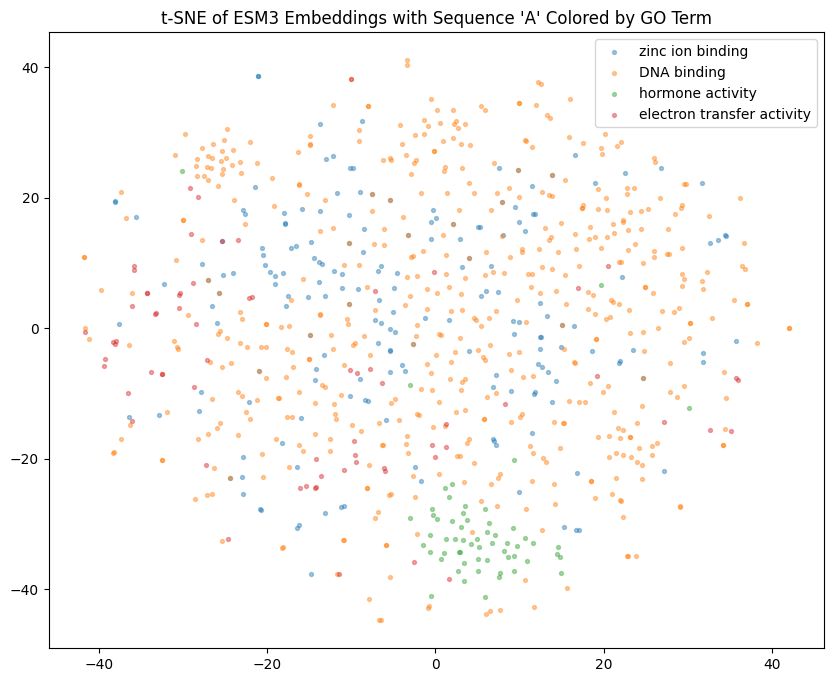

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


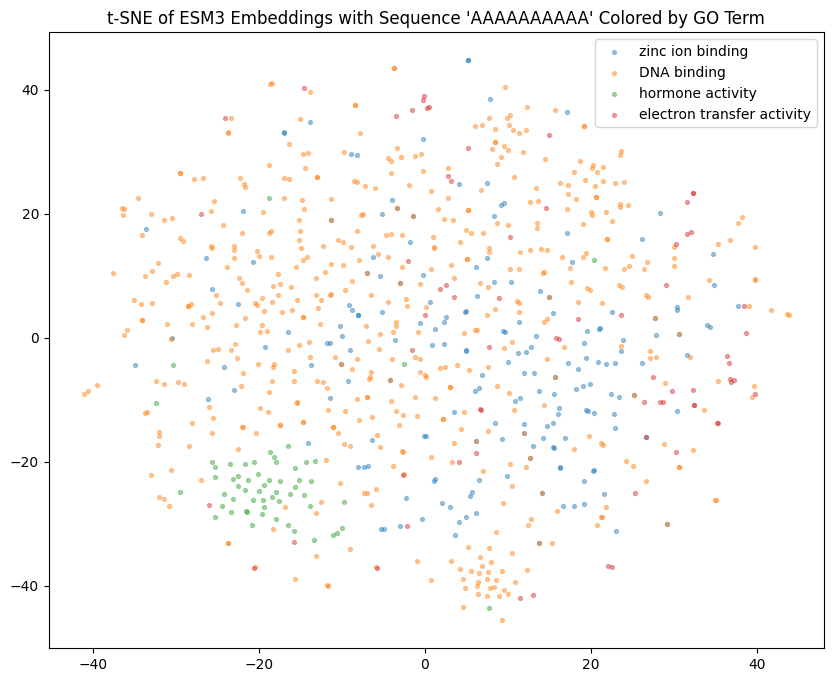

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


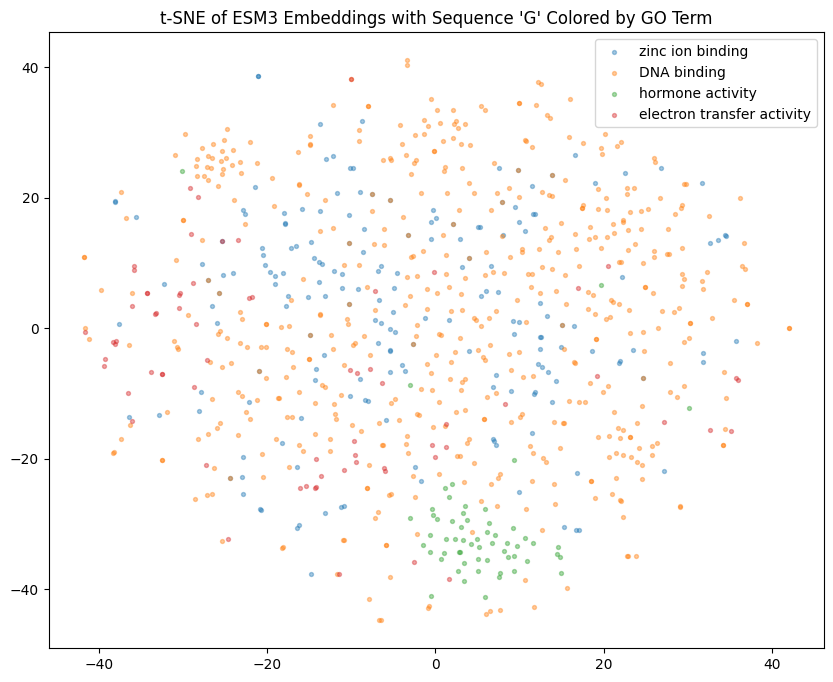

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


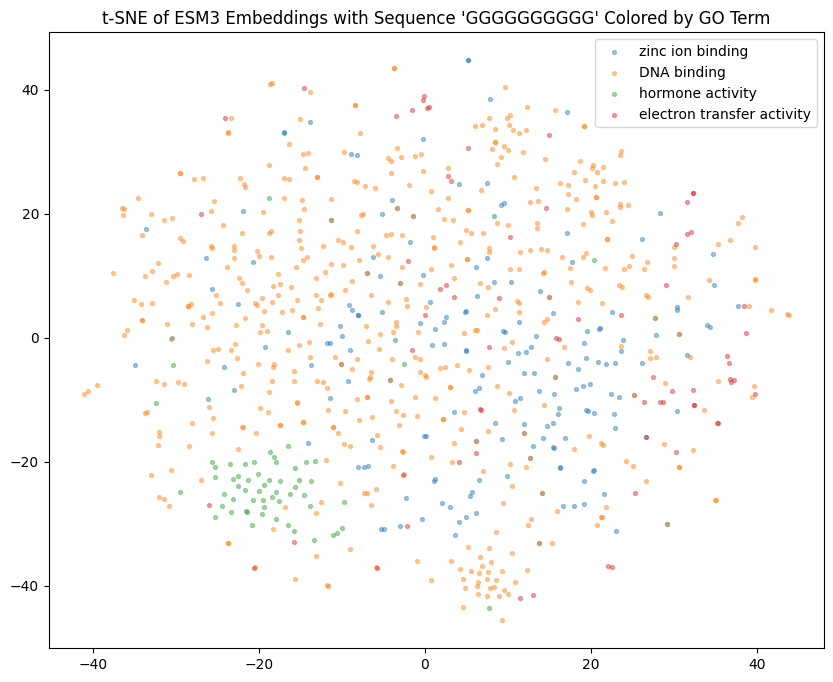

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


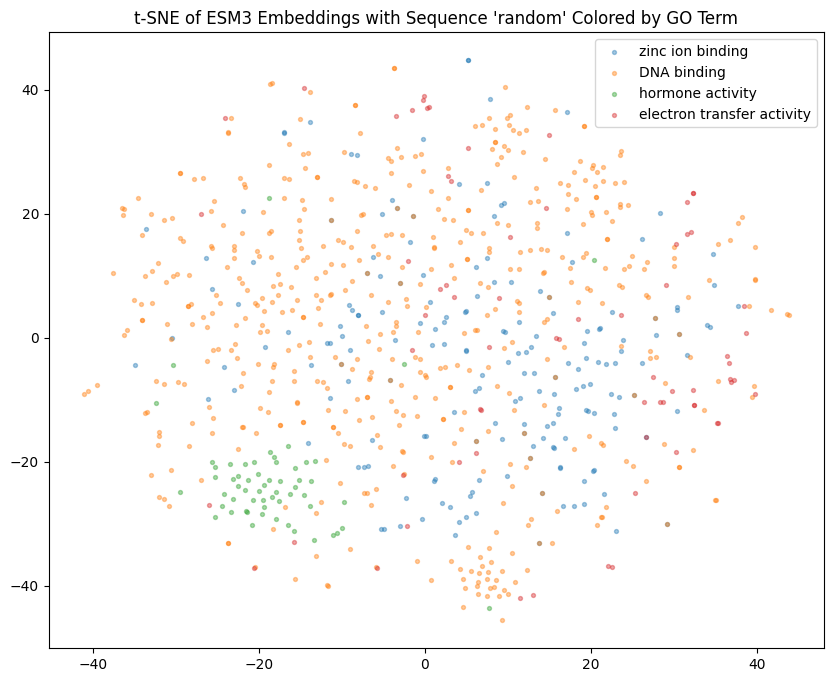

In [18]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Perform dimensionality reduction and plotting for each sequence
for seq in sequences:
    all_embeddings = []
    go_terms_for_embeddings = []

    # Collect embeddings for the current sequence
    for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
        for embedding in embeddings_by_sequence[seq]:
            all_embeddings.append(embedding)
            go_terms_for_embeddings.append(go_term)

    # Perform t-SNE and plot if there are embeddings
    if all_embeddings:
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
        reduced_embeddings = tsne.fit_transform(np.array(all_embeddings))

        plt.figure(figsize=(10, 8))
        for go_term in set(go_terms_for_embeddings):
            indices = [i for i, term in enumerate(go_terms_for_embeddings) if term == go_term]
            plt.scatter(
                reduced_embeddings[indices, 0],
                reduced_embeddings[indices, 1],
                label=GO_term_name_dict.get(go_term, go_term),
                alpha=0.4,
                s=8
            )

        plt.legend()
        plt.title(f"t-SNE of ESM3 Embeddings with Sequence '{seq}' Colored by GO Term")
        plt.show()


Targeted GO Analysis (picking GO terms that we would expect no overlapping from)

In [22]:
# Create an empty dictionary to store the InterPro IDs for each GO term
go_term_to_interpro_ids = {
    'GO:0005576': [],
    'GO:0005739': [],
    'GO:0005634': [],
}

# Iterate through the DataFrame rows
for index, row in df.iterrows():
  go_terms = str(row['GO Terms']).split(',')
  for go_term in go_terms:
    if go_term in go_term_to_interpro_ids:
      go_term_to_interpro_ids[go_term].append(row['Accession'])

# Print the lists of InterPro IDs for each GO term
for go_term, interpro_ids in go_term_to_interpro_ids.items():
  print(f"Number of InterPro IDs for {go_term}: {len(interpro_ids)}")

GO_term_name_dict = {
    'GO:0005576': 'extracellular region',
    'GO:0005739': 'mitochondrion',
    'GO:0005634': 'nucleus',
}

Number of InterPro IDs for GO:0005576: 359
Number of InterPro IDs for GO:0005739: 69
Number of InterPro IDs for GO:0005634: 320


In [23]:
# List of sequences to generate embeddings for
sequences = ["A", "AAAAAAAAAA"]

# Dictionary to store embeddings for all sequences by GO term
go_term_to_embeddings = {}
i = 0

# Process GO terms for each sequence
for go_term, interpro_ids in go_term_to_interpro_ids.items():
    embeddings_by_sequence = {seq: [] for seq in sequences}

    for interpro_id in interpro_ids:
        for seq in sequences:
            if seq=="random":
              actual_seq = generate_random_sequence()
            else:
              actual_seq = seq
            embedding = get_label_embedding(interpro_id, sequence=actual_seq)
            if embedding is not None:
                embeddings_by_sequence[seq].append(embedding)

        if i % 100 == 0:
            print(f"Processed {i} GO terms")
        i += 1

    go_term_to_embeddings[go_term] = embeddings_by_sequence

Processed 0 GO terms
Processed 100 GO terms
Processed 200 GO terms
Processed 300 GO terms
Processed 400 GO terms
Processed 500 GO terms
Processed 600 GO terms
Processed 700 GO terms


In [24]:
# Create a copy of the original dictionary
original_go_term_to_embeddings = go_term_to_embeddings.copy()

# Iterate through the dictionary and remove all-zero arrays
new_go_term_to_embeddings = {}
for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
    new_embeddings_by_sequence = {}
    for sequence, embeddings in embeddings_by_sequence.items():
        new_embeddings = []
        for embedding in embeddings:
            if embedding is not None and not np.allclose(embedding, 0):
                new_embeddings.append(embedding)
        new_embeddings_by_sequence[sequence] = new_embeddings
    new_go_term_to_embeddings[go_term] = new_embeddings_by_sequence

go_term_to_embeddings = new_go_term_to_embeddings
go_term_to_embeddings

{'GO:0005576': {'A': [array([ 0.16308594,  0.2734375 ,  0.15820312, ..., -0.05322266,
           0.47265625, -0.3203125 ], dtype=float32),
   array([ 0.05395508,  1.1953125 ,  0.6328125 , ...,  0.34179688,
           0.36328125, -0.07128906], dtype=float32),
   array([-0.03393555,  0.94921875, -0.22167969, ..., -0.21875   ,
          -1.296875  ,  0.83203125], dtype=float32),
   array([ 0.88671875,  0.0546875 ,  0.02575684, ...,  0.8046875 ,
          -0.671875  , -0.07714844], dtype=float32),
   array([ 0.41992188,  0.578125  ,  0.64453125, ...,  0.15820312,
          -0.82421875,  0.2109375 ], dtype=float32),
   array([-0.59375   , -0.9296875 ,  0.93359375, ...,  0.04394531,
          -0.4609375 ,  0.5234375 ], dtype=float32),
   array([-0.04174805, -0.01831055, -0.625     , ...,  0.04858398,
          -0.91796875, -0.40820312], dtype=float32),
   array([ 0.45898438, -0.03149414, -0.07275391, ...,  0.72265625,
          -0.02929688,  0.65625   ], dtype=float32),
   array([-0.31054688

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


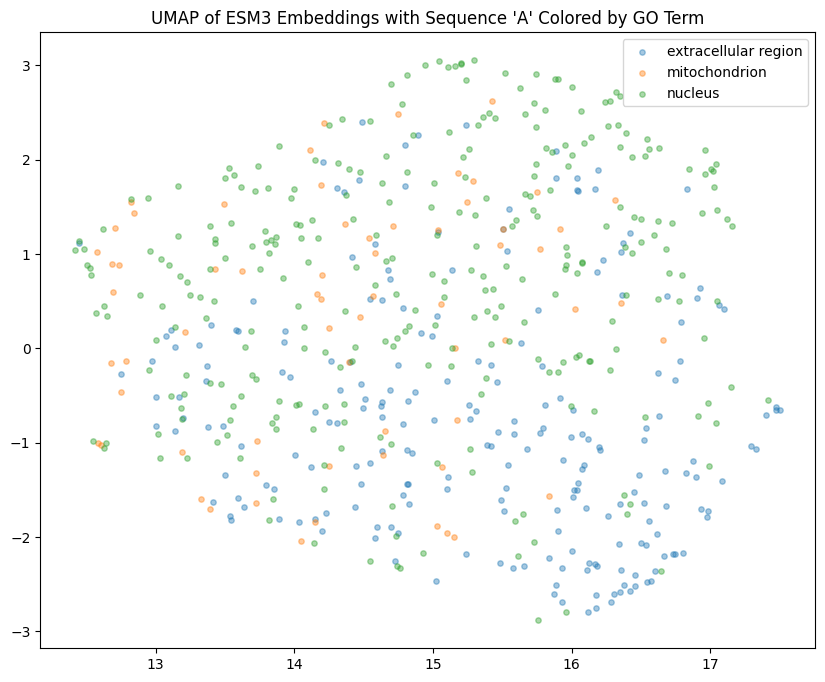

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


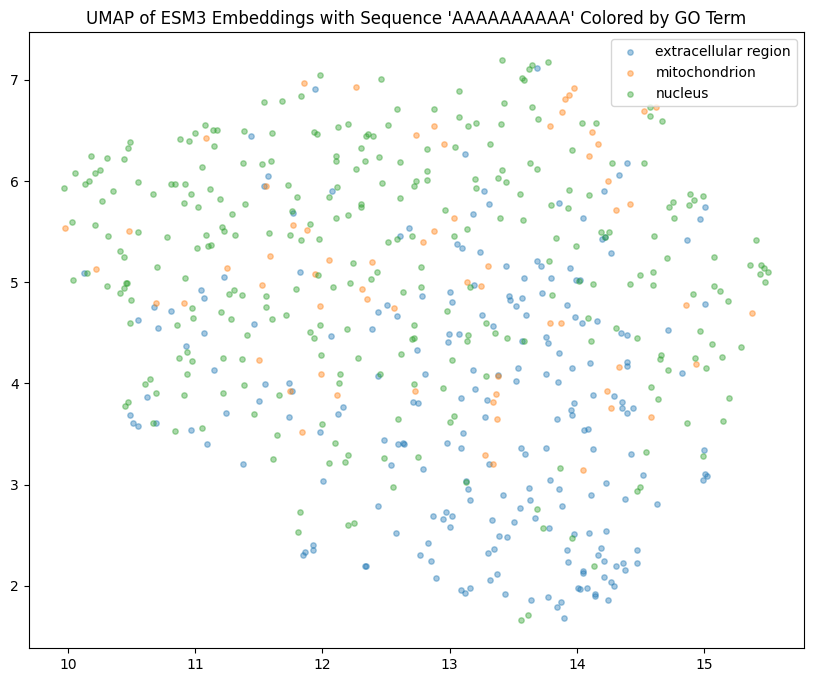

In [27]:
# Perform dimensionality reduction and plotting for each sequence
for seq in sequences:
    all_embeddings = []
    go_terms_for_embeddings = []

    # Collect embeddings for the current sequence
    for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
        for embedding in embeddings_by_sequence[seq]:
            all_embeddings.append(embedding)
            go_terms_for_embeddings.append(go_term)

    # Perform UMAP and plot if there are embeddings
    if all_embeddings:
        reducer = UMAP(n_components=2, random_state=42)
        reduced_embeddings = reducer.fit_transform(np.array(all_embeddings))

        plt.figure(figsize=(10, 8))
        for go_term in set(go_terms_for_embeddings):
            indices = [i for i, term in enumerate(go_terms_for_embeddings) if term == go_term]
            plt.scatter(
                reduced_embeddings[indices, 0],
                reduced_embeddings[indices, 1],
                label=GO_term_name_dict.get(go_term, go_term),
                alpha=0.4,
                s=15
            )

        plt.legend()
        plt.title(f"UMAP of ESM3 Embeddings with Sequence '{seq}' Colored by GO Term")
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


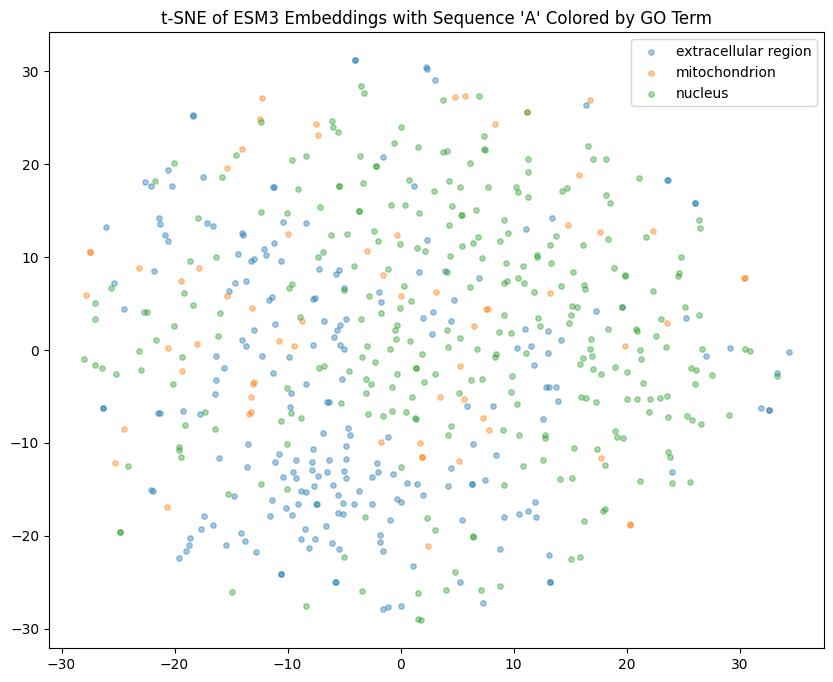

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


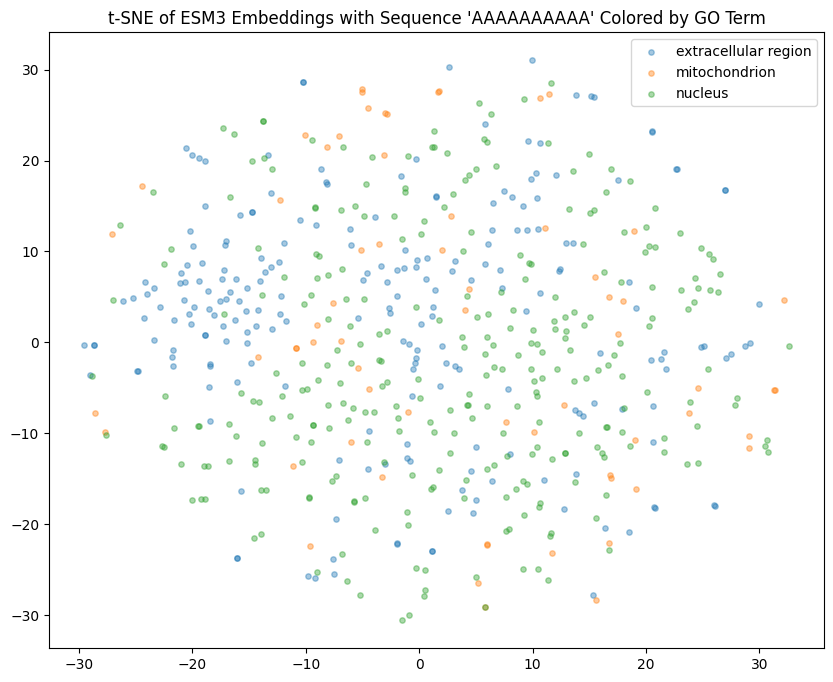

In [28]:
# Perform dimensionality reduction and plotting for each sequence
for seq in sequences:
    all_embeddings = []
    go_terms_for_embeddings = []

    # Collect embeddings for the current sequence
    for go_term, embeddings_by_sequence in go_term_to_embeddings.items():
        for embedding in embeddings_by_sequence[seq]:
            all_embeddings.append(embedding)
            go_terms_for_embeddings.append(go_term)

    # Perform t-SNE and plot if there are embeddings
    if all_embeddings:
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
        reduced_embeddings = tsne.fit_transform(np.array(all_embeddings))

        plt.figure(figsize=(10, 8))
        for go_term in set(go_terms_for_embeddings):
            indices = [i for i, term in enumerate(go_terms_for_embeddings) if term == go_term]
            plt.scatter(
                reduced_embeddings[indices, 0],
                reduced_embeddings[indices, 1],
                label=GO_term_name_dict.get(go_term, go_term),
                alpha=0.4,
                s=15
            )

        plt.legend()
        plt.title(f"t-SNE of ESM3 Embeddings with Sequence '{seq}' Colored by GO Term")
        plt.show()


Test Protein (Ubiquitin)

In [ ]:
protein = model.generate(protein, GenerationConfig(track="function", num_steps=8))
print(protein.function_annotations)

100%|██████████| 8/8 [00:05<00:00,  1.47it/s]
/usr/local/lib/python3.10/dist-packages/esm/pretrained.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

[FunctionAnnotation(label='glycosyl', start=1, end=3), FunctionAnnotation(label='glycosyl', start=7, end=7), FunctionAnnotation(label='glycosyl', start=10, end=10), FunctionAnnotation(label='glycosyl', start=73, end=80), FunctionAnnotation(label='glycosyl', start=148, end=150), FunctionAnnotation(label='glycosyl', start=152, end=158), FunctionAnnotation(label='glycosyl', start=221, end=221), FunctionAnnotation(label='glycosyl', start=224, end=227), FunctionAnnotation(label='glycosyl', start=229, end=234), FunctionAnnotation(label='glycosyl', start=238, end=238), FunctionAnnotation(label='glycosyl', start=285, end=285), FunctionAnnotation(label='glycosyl', start=300, end=301), FunctionAnnotation(label='glycosyl', start=305, end=310), FunctionAnnotation(label='glycosyl', start=314, end=314), FunctionAnnotation(label='glycosyl', start=322, end=322), FunctionAnnotation(label='glycosyl', start=361, end=361), FunctionAnnotation(label='glycosyl', start=376, end=378), FunctionAnnotation(label=

In [ ]:
prompt1 = "MRHGDISSSNDTVGVAVVNYKMPRLHTAAEVLDNARKIAEMIVGMKQGLPGMDLVVFPEYSLQGIMYDPAEMMETAVAIPGEETEIFSRACRKANVWGVFSLTGERHEEHPRKAPYNTLVLIDNNGEIVQKYRKIIPWCPIEGWYPGGQTYVSEGPKGMKISLIICDDGNYPRIWRDCAMKGAELIVRCQGYMYPAKDQQVMMAKAMAWANNCYVAVANAAGFDGVYSYFGHSAIIGFDGRTLGECGEEEMGIQYAQLSLSQIRDARANDQSQNHLFKILHRGYSGLQASGDGDRGLAECPFEFYRTWVTDAEKARENVERLTRSTTGVAQCPVGRLPYEGLEKEA"
prompt2 = "MRHGDISSSNDTVGVAVVNYKMPRLHTAAEVLDNARKIAEMIVGMKQGLPGMDLVVFPEYSLQGIMYDPAEMMETAVAIPGEETEIFSRACRKANVWGVFSLTGERHEEHPRKAPYNTLVLIDNNGEIVQKYRKIIPWCPIEGWYPGGQTYVSEGPKGMKISLIICDDGNYPEIWRDCAMKGAELIVRCQGYMYPAKDQQVMMAKAMAWANNCYVAVANAAGFDGVYSYFGHSAIIGFDGRTLGECGEEEMGIQYAQLSLSQIRIARANDQSQNHLFKILHRGYSGLQASGDGDRGLAECPFEFYRTWVTDAEKARENVERLTRSTTGVAQCPVGRLPYEGLEKEA"
proteins = []
for prompt in prompt1, prompt2:
  protein = ESMProtein(sequence=prompt)
  protein = model.generate(protein, GenerationConfig(track="function", num_steps=8))
  proteins.append(protein)

print(proteins[0].function_annotations)

100%|██████████| 8/8 [00:05<00:00,  1.49it/s]
/usr/local/lib/python3.10/dist-packages/esm/pretrained.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

[FunctionAnnotation(label='adenyl', start=12, end=277), FunctionAnnotation(label='adenyl', start=279, end=279), FunctionAnnotation(label='adenyl nucleotide', start=12, end=277), FunctionAnnotation(label='adenyl nucleotide', start=279, end=279), FunctionAnnotation(label='adenyl ribonucleotide', start=12, end=277), FunctionAnnotation(label='adenyl ribonucleotide', start=279, end=279), FunctionAnnotation(label='anion binding', start=12, end=277), FunctionAnnotation(label='anion binding', start=279, end=279), FunctionAnnotation(label='atp binding', start=12, end=277), FunctionAnnotation(label='atp binding', start=279, end=279), FunctionAnnotation(label='decarboxylase', start=12, end=13), FunctionAnnotation(label='decarboxylase', start=270, end=277), FunctionAnnotation(label='decarboxylase', start=279, end=279), FunctionAnnotation(label='dehydrogenase', start=12, end=277), FunctionAnnotation(label='dehydrogenase', start=279, end=279), FunctionAnnotation(label='derivative binding', start=12,

In [ ]:
print(proteins[1].function_annotations)

[FunctionAnnotation(label='adenyl', start=12, end=277), FunctionAnnotation(label='adenyl', start=279, end=279), FunctionAnnotation(label='adenyl nucleotide', start=12, end=277), FunctionAnnotation(label='adenyl nucleotide', start=279, end=279), FunctionAnnotation(label='adenyl ribonucleotide', start=12, end=277), FunctionAnnotation(label='adenyl ribonucleotide', start=279, end=279), FunctionAnnotation(label='anion binding', start=12, end=277), FunctionAnnotation(label='anion binding', start=279, end=279), FunctionAnnotation(label='atp binding', start=12, end=277), FunctionAnnotation(label='atp binding', start=279, end=279), FunctionAnnotation(label='decarboxylase', start=12, end=13), FunctionAnnotation(label='decarboxylase', start=270, end=277), FunctionAnnotation(label='decarboxylase', start=279, end=279), FunctionAnnotation(label='dehydrogenase', start=12, end=277), FunctionAnnotation(label='dehydrogenase', start=279, end=279), FunctionAnnotation(label='derivative binding', start=12,

In [ ]:
for i in range(min(len(proteins[0].function_annotations), len(proteins[1].function_annotations))):
  if proteins[0].function_annotations[i] != proteins[1].function_annotations[i]:
    print(i)
    print(proteins[0].function_annotations[i])
    print(proteins[1].function_annotations[i])

67
FunctionAnnotation(label='Arginine repressor (IPR001669)', start=14, end=270)
FunctionAnnotation(label='Arginine repressor (IPR001669)', start=14, end=269)
75
FunctionAnnotation(label='Ferric-uptake regulator (IPR002481)', start=14, end=270)
FunctionAnnotation(label='Ferric-uptake regulator (IPR002481)', start=14, end=269)
78
FunctionAnnotation(label='Aminoacyl-tRNA synthetase, class II (D/K/N) (IPR004364)', start=14, end=270)
FunctionAnnotation(label='Aminoacyl-tRNA synthetase, class II (D/K/N) (IPR004364)', start=14, end=269)
80
FunctionAnnotation(label='Aspartate-tRNA ligase, type 1 (IPR004524)', start=14, end=270)
FunctionAnnotation(label='Aspartate-tRNA ligase, type 1 (IPR004524)', start=14, end=269)
85
FunctionAnnotation(label='Glycoside hydrolase, family 2 (IPR006101)', start=14, end=270)
FunctionAnnotation(label='Glycoside hydrolase, family 2 (IPR006101)', start=14, end=269)
91
FunctionAnnotation(label='RNA polymerase Rpb2, domain 2 (IPR007642)', start=14, end=270)
FunctionA

In [ ]:
print(len(protein.function_annotations))
print(len(protein.sequence))

117
346


In [ ]:
for functional_token in protein.function_annotations:
    print(functional_token)

FunctionAnnotation(label='glycosyl', start=1, end=3)
FunctionAnnotation(label='glycosyl', start=7, end=7)
FunctionAnnotation(label='glycosyl', start=10, end=10)
FunctionAnnotation(label='glycosyl', start=73, end=80)
FunctionAnnotation(label='glycosyl', start=148, end=150)
FunctionAnnotation(label='glycosyl', start=152, end=158)
FunctionAnnotation(label='glycosyl', start=221, end=221)
FunctionAnnotation(label='glycosyl', start=224, end=227)
FunctionAnnotation(label='glycosyl', start=229, end=234)
FunctionAnnotation(label='glycosyl', start=238, end=238)
FunctionAnnotation(label='glycosyl', start=285, end=285)
FunctionAnnotation(label='glycosyl', start=300, end=301)
FunctionAnnotation(label='glycosyl', start=305, end=310)
FunctionAnnotation(label='glycosyl', start=314, end=314)
FunctionAnnotation(label='glycosyl', start=322, end=322)
FunctionAnnotation(label='glycosyl', start=361, end=361)
FunctionAnnotation(label='glycosyl', start=376, end=378)
FunctionAnnotation(label='glycosyl', start=

In [ ]:
protein_tensor = model.encode(protein)

In [ ]:
print(protein_tensor.function)

tensor([[  0,   0,   0,  ...,   0,   0,   0],
        [ 64,  59,  75,  ..., 252, 124, 137],
        [ 48, 187,  83,  ..., 244, 124, 137],
        ...,
        [  3,   3,   3,  ...,   3,   3,   3],
        [  3,   3,   3,  ...,   3,   3,   3],
        [  0,   0,   0,  ...,   0,   0,   0]], device='cuda:0')


In [ ]:
import pandas as pd

# Assuming 'train_terms.tsv' is in the current directory
df = pd.read_csv('train_terms.tsv', sep='\t')

# Get the number of rows (length)
num_rows = len(df)
print(f"Number of rows: {num_rows}")

# Get the number of unique values in the 'term' column
num_unique_terms = df['term'].nunique()
print(f"Number of unique terms: {num_unique_terms}")

Number of rows: 5363863
Number of unique terms: 31466


In [ ]:
# Dictionary to store sampled DataFrames
sampled_dfs = []

# Group by 'term' and sample 20 rows if possible, otherwise take all rows
i = 0
for term, term_df in df.groupby('term'):
    if len(term_df) >= 20:
        sampled_term_df = term_df.sample(n=20, random_state=42)
    else:
        sampled_term_df = term_df
    sampled_dfs.append(sampled_term_df)
    i += 1
    if i == 5000:
      print(f"Processed {i} terms")

# Concatenate the list into a single DataFrame
new_df = pd.concat(sampled_dfs, ignore_index=True)
print(f"Number of rows: {len(new_df)}")

#Randomly sample 500 categories, get 20 proteins for each, then do UMAP and color by category
#Add visualization to progress report

Processed 5000 terms
Number of rows: 328742


In [ ]:
pip install biopython

In [ ]:
from Bio import SeqIO
import pandas as pd

# Define the path to your FASTA file
fasta_file = "train_sequences.fasta"

# Parse the FASTA file and convert to a list of dictionaries
sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append({"ID": record.id, "Sequence": str(record.seq)})

# Convert the list of dictionaries to a DataFrame
sequences_df = pd.DataFrame(sequences)

# Display the DataFrame
print(sequences_df.head())


           ID                                           Sequence
0      P20536  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1      O73864  MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2      O95231  MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3  A0A0B4J1F4  MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4      P54366  MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...


In [ ]:
print(new_df.head)

<bound method NDFrame.head of        EntryID        term aspect
0       P48524  GO:0000001    BPO
1       Q06820  GO:0000001    BPO
2       P21147  GO:0000001    BPO
3       Q92328  GO:0000001    BPO
4       Q00402  GO:0000001    BPO
...        ...         ...    ...
328737  Q2U5H9  GO:2001316    BPO
328738  Q2U5I0  GO:2001316    BPO
328739  Q2U5H8  GO:2001317    BPO
328740  Q2U5H9  GO:2001317    BPO
328741  Q2U5I0  GO:2001317    BPO

[328742 rows x 3 columns]>
